<a href="https://colab.research.google.com/github/dctec/mlc/blob/master/week2/StockPrediction/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF RUNNING IN GOOGLE COLAB {

## HOUSEKEEPING FIRST

In [ ]:
# Mount Google Drive to /content/drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
# If project directory does not exist. Run this first (one time only)
%mkdir -p "/content/drive/My Drive/mlc/week2"
%cd "/content/drive/My Drive/mlc/week2"
%mkdir "sample_data"

In [ ]:
# Once the project and sample data directory exist. Change directory
%cd "/content/drive/My Drive/mlc/week2"
%pwd

# } END IF

# IF RUNNING LOCAL WITH ANACONDA {

## Make sure libraries are installed

In [67]:
!conda install -c defaults pandas-datareader seaborn scikit-learn numpy

Solving environment: done

# All requested packages already installed.



# } END IF

# BEGIN

### The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

** STEP 1 **
- Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL 

** Step 1 ** - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

** Step 2 ** - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

** Step 3 ** - Visualize your result using matplotlib or another plotting library of your choice

## -

In [54]:
import sys
print(sys.version)

import datetime
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
# import matplotlib_converters to register the converter 
# and avoid getting the warning on Pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#warnings.warn(msg, FutureWarning)

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pylab import rcParams


from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing ##CORRECTION: was not imported and preprocessing couldn't be called by itself
from sklearn.model_selection import train_test_split




#to plot within notebook
%matplotlib inline


3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


## Fetch new data and save to .csv if needed {

In [63]:
# Pull data from Yahoo for the Stock and dates desired.
## set index=True when saving the CSB file so that
## the Date field is included and not just some
## incremental index key.
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 9, 1)
# end = datetime.date.today()

df = web.DataReader("IBM", 'yahoo', start, end)
df.tail()
df.to_csv('sample_data/IBM_index.csv',index=True)

## };

## Read CSV data {

In [55]:
# Read the data from the CSV and check a few rows
df = pd.read_csv('sample_data/IBM_index.csv')
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
414,2019-08-26,131.300003,129.160004,131.050003,129.990005,2833900.0,129.990005
415,2019-08-27,131.699997,130.309998,131.199997,131.169998,4728000.0,131.169998
416,2019-08-28,132.889999,130.039993,130.440002,132.759995,2713600.0,132.759995
417,2019-08-29,135.690002,134.039993,134.179993,134.880005,2971800.0,134.880005
418,2019-08-30,136.070007,134.360001,135.580002,135.529999,2960600.0,135.529999


In [56]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [57]:
df.shape

(419, 7)

In [58]:
len(df)

419

## };

# PLOT 'ADJ CLOSE' value

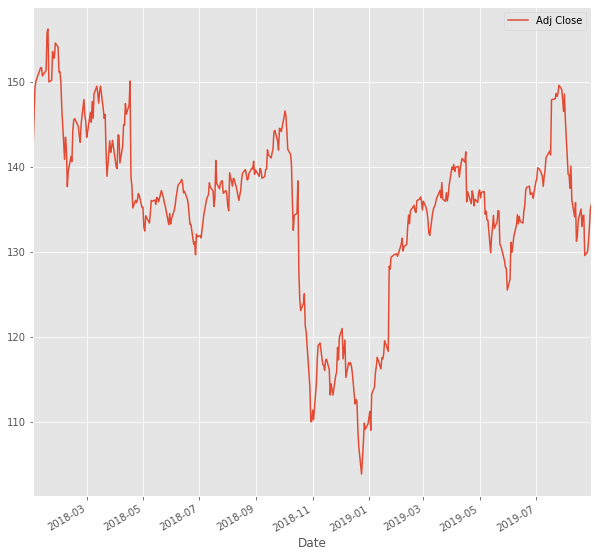

In [76]:


#setting figure size
#rcParams['figure.figsize'] = 10,10
# Define scaler to normalize the data from 0 to 1?
#scaler = MinMaxScaler(feature_range=(0, 1))

#setting index as date
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
#df.index = df['Date']

#Adjusting the style of matplotlib
style.use('ggplot')

#plot
#plt.figure(figsize=(16,8))
#plt.plot(df['Adj Close'], label='Adjusted Close Value history')
df['Adj Close'].plot(label="Adj Close")
plt.legend()


# PLOT MOVING AVERAGE

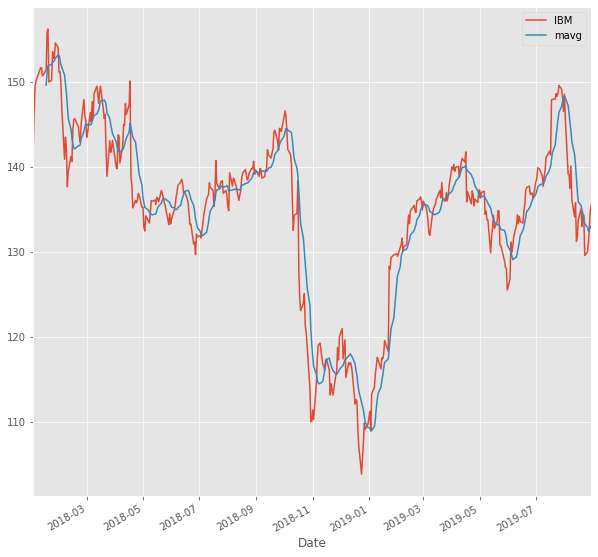

In [71]:
#Find the rolling mean of the stock
close_px = df['Adj Close']
mavg = close_px.rolling(window=10).mean()

#Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='IBM')
mavg.plot(label='mavg')
plt.legend()

# PLOT LINEAR REGRESSION (LEAST SQUARES)

In [112]:
#df['Open'].head()

df['Adj Close'].tail(5)



Date
2019-08-26    129.990005
2019-08-27    131.169998
2019-08-28    132.759995
2019-08-29    134.880005
2019-08-30    135.529999
Name: Adj Close, dtype: float64

In [106]:
df['Adj Close'].tail(5).values

array([129.99000549, 131.16999817, 132.75999451, 134.88000488,
       135.52999878])

In [107]:
df['Adj Close'].tail(5).values.reshape(-1,1)

array([[129.99000549],
       [131.16999817],
       [132.75999451],
       [134.88000488],
       [135.52999878]])

In [110]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,419.000000,419.000000,419.000000,419.000000,4.190000e+02,419.000000
mean,142.170740,139.925226,141.077995,141.019881,4.833886e+06,135.143204
std,11.967288,12.014515,12.007431,11.965400,3.036964e+06,10.054147
min,111.000000,105.940002,108.000000,107.570000,1.849800e+06,103.859131
25%,135.720001,133.805000,134.885002,134.915001,3.189800e+06,132.147400
50%,143.100006,141.279999,142.300003,142.449997,3.939300e+06,136.410797
75%,149.035004,146.610001,147.870003,147.644997,5.219600e+06,140.588303
max,171.130005,168.149994,170.000000,169.119995,2.206370e+07,156.219681


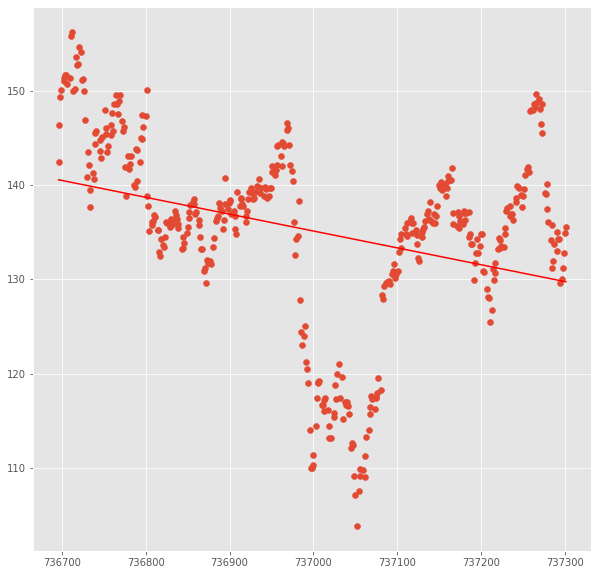

In [118]:
from sklearn.linear_model import LinearRegression

# Need to convert Date field from [ns] type format to 
# a numerical value that can be casted to the same type
# as 'Adj Close' because all values in a numpy array need
# to be the same type (or be able to cast them)
dfs = df.copy()
dfs['Date']=pd.to_datetime(dfs.Date,format='%Y-%m-%d')
dfs['Date']=dfs['Date'].map(datetime.datetime.toordinal)

# .values method converts into a numpy array
# .reshape(-1,1) transforms array([abc, def]) into array([[abc],[def])
X = dfs.loc[:, ['Date']].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dfs.loc[:, ['Adj Close']].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Adjusting the style of matplotlib
style.use('ggplot')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [45]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()




,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-08-26,129.990005,2833900.0,1.646280,-0.808850
2019-08-27,131.169998,4728000.0,1.059693,-0.022865
2019-08-28,132.759995,2713600.0,2.146736,1.778589
2019-08-29,134.880005,2971800.0,1.223316,0.521696
2019-08-30,135.529999,2960600.0,1.261718,-0.036881


In [48]:
# Determine if any value in the series is null or missing (Nan in pandas)
df['Adj Close'].isnull().sum()

0

In [52]:
len(df), int(math.ceil(.01 * len(df)))

(419, 5)

In [24]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Adj Close'])
for i in range(0,len(df)):
     new_data['Date'][i] = df['Date'][i]
     new_data['Adj Close'][i] = df['Adj Close'][i]


In [29]:
train = new_data[:350]
valid = new_data[350:]

In [30]:
train.shape

(350, 2)

In [31]:
valid.shape

(69, 2)

# Moving Average

In [ ]:


preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-348+i:].sum() + sum(preds)
    b = a/348
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

/Users/tecnico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tecnico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


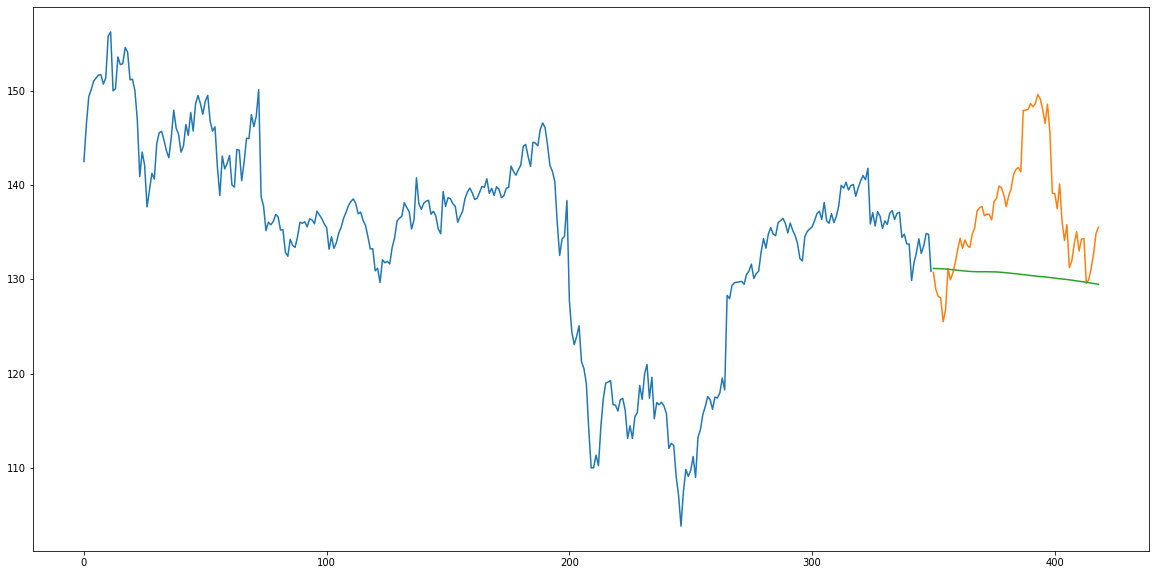

In [34]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])

# Linear Regression

In [36]:
from fastai.structured import add_datepart

ModuleNotFoundError: No module named 'fastai'

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj Close'][i] = data['Adj Close'][i]
    
#create features
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
